In [24]:
# coding:utf-8
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split


%matplotlib inline


In [25]:
train_big_table = pd.read_csv('train_big_table_6.csv',encoding='utf-8',index_col = False, delimiter='\t')
train_big_table.head()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13,25,26,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,jd_no,browsed,delivered,satisfied,mix_sat,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,...,min_years&jd_sub_type,jd_sub_type&require_nums,jd_match_num,jd_match_title,jd_match_dec,jd_match_exp,title_len,cur_hit_num,desire_len,desire_hit_num
0,17e1b9f107dd1214bd78dec6d91593a4,4ce99de185f55bea127ccd74c4bbf0ad,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,4工程造价/预结算,工程造价/预结算5,2,True,0,5,4,0,2,2
1,17e1b9f107dd1214bd78dec6d91593a4,e9959d3b5fd8b26da07e8b8a3b80489a,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,-1项目招投标,项目招投标3,0,False,0,10,4,0,2,0
2,04edcbfd579b127171e32d7e334f9368,e9959d3b5fd8b26da07e8b8a3b80489a,1,1,0,3,551,"551,551,551","电气/电力/水利,房地产/建筑/建材/工程","项目招投标,前台/总机/接待,内勤人员",...,-1项目招投标,项目招投标3,1,False,0,1,1,0,5,1
3,17e1b9f107dd1214bd78dec6d91593a4,7ecd6ab0c7e43b40b7d1dbd4a9b1e6f5,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,1工程造价/预结算,工程造价/预结算1,2,False,1,4,4,0,2,2
4,17e1b9f107dd1214bd78dec6d91593a4,112ea9c8ef92c1a7d5fa679cc6c05053,0,0,0,0,551,"551,-,-",房地产/建筑/建材/工程,工程造价/预结算,...,1工程造价/预结算,工程造价/预结算1,2,False,1,4,4,0,2,2


In [26]:
test_big_table = pd.read_csv('test_big_table_6.csv',encoding='utf-8',index_col = False, delimiter='\t')
test_big_table.head()

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_id,jd_no,live_city_id,desire_jd_city_id,desire_jd_industry_id,desire_jd_type_id,desire_jd_salary_id,cur_industry_id,cur_jd_type,cur_salary_id,...,min_years&jd_sub_type,jd_sub_type&require_nums,jd_match_num,jd_match_title,jd_match_dec,jd_match_exp,title_len,cur_hit_num,desire_len,desire_hit_num
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,4行政经理/主管/办公室主任,行政经理/主管/办公室主任1,3,True,0,3,3,3,2,0
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,4后勤人员,后勤人员1,0,False,0,3,3,0,2,0
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,-1行政专员/助理,行政专员/助理1,2,True,0,3,3,0,2,2
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","房地产/建筑/建材/工程,物业管理/商业中心",行政专员/助理,400106000,旅游/度假,行政经理/主管/办公室主任,0400106000,...,2文档/资料管理,文档/资料管理3,0,False,0,2,3,0,2,0
4,0e7587fca175bc2ac62f087f9d4c04c1,da7b5e1d6537d2fca4595c7c1672e609,613,"613,-,-","文体教育|工艺美术,交通|运输|物流|仓储,广告/会展/公关","行政专员/助理,文档/资料管理,文案策划",200104000,教育/培训/院校,行政/后勤/文秘,0200104000,...,2文档/资料管理,文档/资料管理3,2,False,0,4,3,0,5,2


In [27]:
def is_equal_city(x):
    if x['city_equal_desired_city_1'] or x['city_equal_desired_city_2'] or x['city_equal_desired_city_3']:
        return True;
    else:
        return False;


train_big_table['is_equal_city'] = train_big_table.apply(is_equal_city,axis=1)
test_big_table['is_equal_city'] = test_big_table.apply(is_equal_city,axis=1)

In [28]:
def convert_cur_jd(x):
    cur_jd_type = str(x)
    if cur_jd_type=='nan':
        return 0;
    elif cur_jd_type=='其他':
        return 1;
    else:
        return 2

train_big_table['convert_cur_jd'] = train_big_table['cur_jd_type'].apply(convert_cur_jd)
test_big_table['convert_cur_jd'] = test_big_table['cur_jd_type'].apply(convert_cur_jd)


In [29]:
def is_edu_ok(x):
    if x["cur_degree_id"] >= x["min_edu_level"] :
        return True;
    else:
        return False;


train_big_table['is_edu_ok'] = train_big_table.apply(is_edu_ok,axis=1)
test_big_table['is_edu_ok'] = test_big_table.apply(is_edu_ok,axis=1)  


In [30]:
train_big_table.shape

(638731, 76)

In [31]:


cross_feature_names = ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_industry_id&jd_sub_type', 'cur_jd_type&jd_sub_type', 'cur_salary_id&cur_degree_id', 'city&jd_sub_type', 'jd_sub_type&min_salary', 'jd_sub_type&max_salary', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'jd_sub_type&require_nums']
train_big_table.drop(cross_feature_names,axis=1,inplace=True)
train_big_table.shape

(638731, 65)

In [32]:
test_big_table.drop(cross_feature_names,axis=1,inplace=True)
test_big_table.shape

(34032, 61)

In [33]:
def jd_match_exp_covert(x):
    if x>34:
        return  34
    else:
        return x


train_big_table['jd_match_exp'] =  train_big_table['jd_match_exp'].apply(jd_match_exp_covert)
test_big_table['jd_match_exp'] =  test_big_table['jd_match_exp'].apply(jd_match_exp_covert)

In [34]:
#jd_match_dec	jd_match_exp	title_len	cur_hit_num	desire_len	desire_hit_num


def fe_new(df):

    cross_feature_tuple = [("live_city_id","city"),("live_city_id","desire_jd_city_1"),
                          ("cur_salary_id","cur_degree_id"),
                         ("jd_sub_type","is_travel"),
                          ("min_years","jd_sub_type"),
                          ("require_nums","jd_match_exp"),("min_salary","is_edu_ok"),("jd_match_title","is_edu_ok"),
                           ("require_nums","jd_match_dec"),("jd_match_dec","is_edu_ok"),
                           ("require_nums","desire_hit_num"),("min_salary","desire_hit_num"),("desire_hit_num","cur_hit_num"),
                          ]
    cross_feature_names = list(feature[0]+"&"+feature[1] for feature in cross_feature_tuple)
    print("create cross features",cross_feature_names)
    for idx,(fa,fb) in enumerate(cross_feature_tuple):
        df[cross_feature_names[idx]] = df[fa].astype(str)+df[fb].astype(str)
    return cross_feature_names


In [35]:
cross_feature_names = fe_new(train_big_table)
fe_new(test_big_table)

create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_salary_id&cur_degree_id', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'require_nums&jd_match_exp', 'min_salary&is_edu_ok', 'jd_match_title&is_edu_ok', 'require_nums&jd_match_dec', 'jd_match_dec&is_edu_ok', 'require_nums&desire_hit_num', 'min_salary&desire_hit_num', 'desire_hit_num&cur_hit_num']
create cross features ['live_city_id&city', 'live_city_id&desire_jd_city_1', 'cur_salary_id&cur_degree_id', 'jd_sub_type&is_travel', 'min_years&jd_sub_type', 'require_nums&jd_match_exp', 'min_salary&is_edu_ok', 'jd_match_title&is_edu_ok', 'require_nums&jd_match_dec', 'jd_match_dec&is_edu_ok', 'require_nums&desire_hit_num', 'min_salary&desire_hit_num', 'desire_hit_num&cur_hit_num']


['live_city_id&city',
 'live_city_id&desire_jd_city_1',
 'cur_salary_id&cur_degree_id',
 'jd_sub_type&is_travel',
 'min_years&jd_sub_type',
 'require_nums&jd_match_exp',
 'min_salary&is_edu_ok',
 'jd_match_title&is_edu_ok',
 'require_nums&jd_match_dec',
 'jd_match_dec&is_edu_ok',
 'require_nums&desire_hit_num',
 'min_salary&desire_hit_num',
 'desire_hit_num&cur_hit_num']

In [36]:
all_big_table = pd.concat([train_big_table,test_big_table])

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


In [37]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm as tqdm
import lightgbm as lgb

In [38]:
#jd_match_dec	jd_match_exp	title_len	cur_hit_num	desire_len	desire_hit_num

def feature_select(target,*df_list):
    result = []
    cat_features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
         "cur_degree_id","city","jd_sub_type","is_edu_ok",
         "max_salary","min_salary","is_travel","min_years","min_edu_level",
         "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","work_years_statisfied"]+cross_feature_names
    lbl_dict = {}
    for f in cat_features:
        lbl = LabelEncoder()
        lbl.fit(all_big_table[f].astype(str))
        lbl_dict[f] = lbl
    for df in df_list:
        features = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","city","jd_sub_type","require_nums","jd_match_exp",
             "max_salary","min_salary","is_travel","min_years","min_edu_level","is_edu_ok",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "desire_min_salary","desire_max_salary","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num"]+cross_feature_names

        x = df[features]
        if target in df.columns:
            y = df[target]
        else:
            y = None
        for f in cat_features:
            lbl = lbl_dict[f]
            x[f] = lbl.transform(x[f].astype(str))
        result.append((x,y))
    return result

In [43]:
from sklearn.model_selection import KFold

def cross_validate(param=dict(n_estimators=1000,metric="map",colsample_bytree=0.2,max_depth=7,importance_type="gain",device="gpu",gpu_platform_id=0,gpu_device_id=0)
                   ,n_folds=5,target="mix_sat"):
    train_users = train_big_table["user_id"].unique()
    folds = KFold(n_folds,shuffle=True,random_state=42)
    models = []
    test_pred = np.zeros(test_big_table.shape[0])
    scores = []
    for idx,(train_idx,valid_idx) in enumerate(folds.split(train_users)):
        t_user = train_users[train_idx]
        v_user = train_users[valid_idx]
        train_data = train_big_table[train_big_table["user_id"].isin(t_user)]
        valid_data = train_big_table[train_big_table["user_id"].isin(v_user)]
        train_group = train_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        valid_group = valid_data.groupby("user_id",as_index=False).count()["mix_sat"].values
        test_group = test_big_table.groupby("user_id",as_index=False).count()["jd_no"].values
        
        result = feature_select(target,train_data,valid_data,test_big_table)
        t_x,t_y = result[0]
        v_x,v_y = result[1]
        test_x,_ = result[2]
        model = lgb.LGBMRanker(**param)
        print("Fold",idx,"-"*30)
        model.fit(t_x,t_y,group=train_group,eval_set=[(t_x,t_y),(v_x,v_y)],eval_group=[train_group,valid_group],early_stopping_rounds=100,verbose=10,
                  callbacks=[lgb.reset_parameter(learning_rate=lambda x: 0.03)]
                 )
        models.append(model)
        test_pred += model.predict(test_x)/n_folds
        scores.append(model.best_score_["valid_1"]["map@1"])
    print("mean score",np.mean(scores))
    return models,test_pred

In [44]:
test_big_table.shape

(34032, 74)

In [52]:
models,pred = cross_validate(target="mix_sat",param=dict(n_estimators=1000,metric="map",subsample=0.8,min_split_gain=10,colsample_bytree=0.8,max_depth=2,importance_type="gain",device="gpu",gpu_platform_id=0,gpu_device_id=0),n_folds=5)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Fold 0 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	training's map@1: 0.183259	valid_1's map@1: 0.18465
[20]	training's map@1: 0.183537	valid_1's map@1: 0.186874
[30]	training's map@1: 0.197998	valid_1's map@1: 0.197998
[40]	training's map@1: 0.200779	valid_1's map@1: 0.196885
[50]	training's map@1: 0.207175	valid_1's map@1: 0.197998
[60]	training's map@1: 0.213293	valid_1's map@1: 0.196885
[70]	training's map@1: 0.212736	valid_1's map@1: 0.197998
[80]	training's map@1: 0.214405	valid_1's map@1: 0.201335
[90]	training's map@1: 0.213293	valid_1's map@1: 0.19911
[100]	training's map@1: 0.214127	valid_1's map@1: 0.200222
[110]	training's map@1: 0.213849	valid_1's map@1: 0.19911
[120]	training's map@1: 0.213571	valid_1's map@1: 0.200222
Early stopping, best iteration is:
[26]	training's map@1: 0.194939	valid_1's map@1: 0.204672
Fold 1 ------------------------------
Training until validation scores don't improve for 100 rounds.
[10]	trai

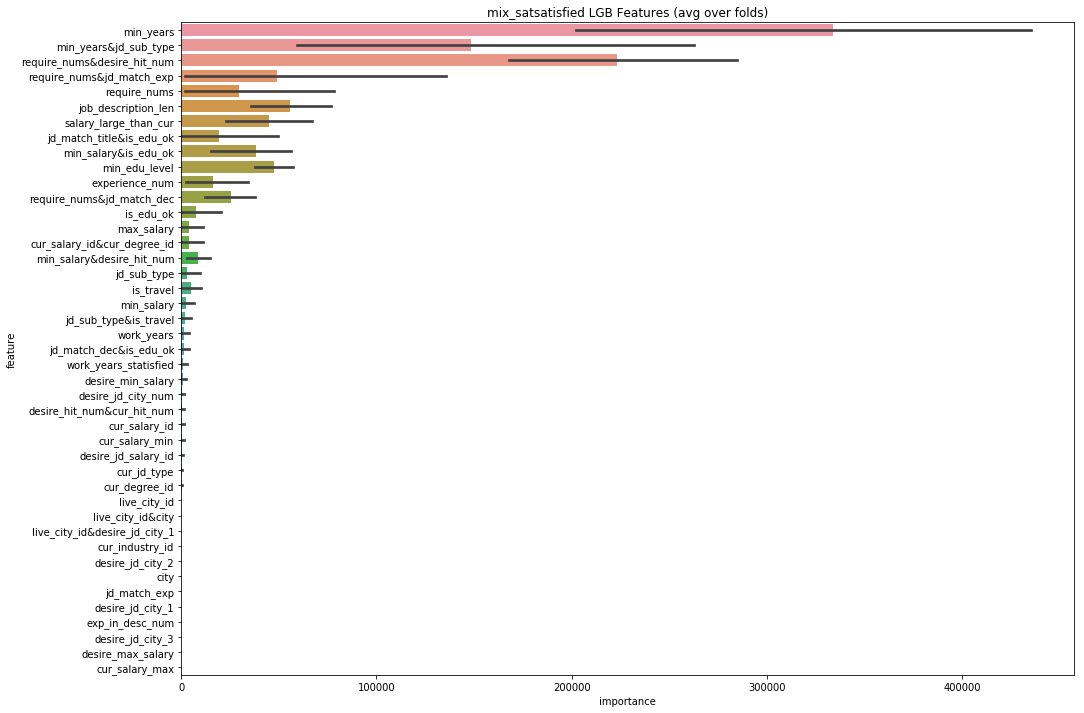

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame()
for idx,model in enumerate(models):
    fold_importance = pd.DataFrame()
    fold_importance["feature"] = ["live_city_id","desire_jd_salary_id","cur_industry_id","cur_jd_type","cur_salary_id",
             "cur_degree_id","city","jd_sub_type","require_nums","jd_match_exp",
             "max_salary","min_salary","is_travel","min_years","min_edu_level","is_edu_ok",
             "desire_jd_city_1","desire_jd_city_2","desire_jd_city_3","exp_in_desc_num",
                   "desire_min_salary","desire_max_salary","cur_salary_min",
                   "cur_salary_max","salary_large_than_cur","job_description_len","experience_num","work_years_statisfied","work_years","desire_jd_city_num"]+cross_feature_names

    fold_importance["importance"] = model.feature_importances_
    fold_importance["fold"] = idx
    feature_importance = pd.concat([feature_importance,fold_importance])
plt.figure(figsize=(16, 12));
sns.barplot(x="importance", y="feature", data=feature_importance.sort_values(by="importance", ascending=False));
plt.title('mix_satsatisfied LGB Features (avg over folds)');

In [49]:
test_action = pd.read_csv("data/zhaopin_round1_user_exposure_A_20190723",delim_whitespace=True)
test_action.head()

,user_id,jd_no
0,035b5c8e977d2f76628d9b7edfc95323,669576ca43ff7b2b6f5bc97a3dfeda9e
1,035b5c8e977d2f76628d9b7edfc95323,2fc7d27894fe1776e7b76546deb8ae5d
2,035b5c8e977d2f76628d9b7edfc95323,bd97a1c4461ac4984f4211c1c75f7f7a
3,035b5c8e977d2f76628d9b7edfc95323,da7b5e1d6537d2fca4595c7c1672e609
4,035b5c8e977d2f76628d9b7edfc95323,5bc733283200a5d7b5cf3eb45cde4db7


In [50]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
result[["user_id","jd_no"]].to_csv("submission.csv",index=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [51]:
submit = test_big_table[["user_id","jd_no"]]
submit["score"] = pred
submit = submit.reset_index(drop=True)
result = pd.merge(test_action,submit,how="left",on=["user_id","jd_no"])
result.fillna(-100,inplace=True)
result = result.groupby("user_id",as_index=False).apply(lambda x:x.sort_values("score",ascending=False))
# 需要对结果进行去重
result[["user_id","jd_no"]].drop_duplicates().to_csv("submission.csv",index=False)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [ ]:
#work_years_statisfied=1
#is_edu_ok？ 1
#year&is_city_eq 